In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")

In [71]:
from scipy.ndimage import convolve
import numpy as np
from matplotlib import pyplot as plt

from uilc import PositionArray
from uilc.utils import radiation

In [72]:
s= 50
H = 0.05
W= 0.1

In [73]:
k = 21
n = 2*k if k%2 ==0 else 2*k-1 
d = lambda i, j, n: (n/2-i)**2 + (n/2-j)**2
dw = W/n

In [76]:
filter =np.fromfunction(lambda i, j: radiation.lambertian(0, (dw) *np.sqrt(d(i, j, n)), s, H), (n,n), dtype=float)

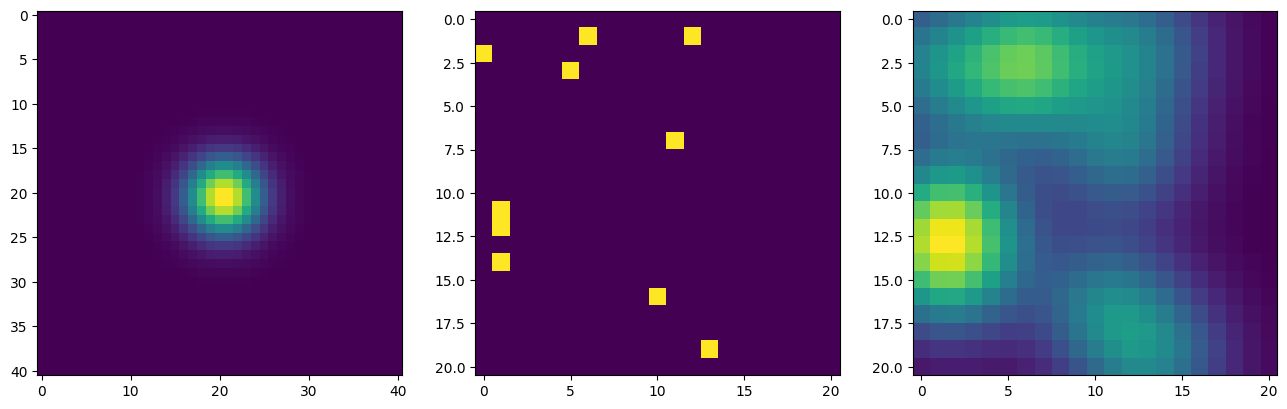

In [84]:
distribution = np.where(np.random.rand(*(k, k)) >= 0.98, 1, 0)
intensity = convolve(distribution, filter, mode='constant', cval=0.0)
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(1, 3, 1)# filter
ax2 = fig.add_subplot(1, 3, 2)# distribution
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(filter)
ax2.imshow(distribution)
ax3.imshow(intensity)
plt.show()